In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
file = '../Analysis/NCVS_dirty.csv'

In [4]:
df = pd.read_csv(file)

In [5]:
df.head()

,year,weight,gender,race1r,hispanic,ethnic1r,ager,marital2,hincome,popsize,...,notify,weapon,weapcat,newcrime,newoff,seriousviolent,injury,treatment,vicservices,locationr
0,1993,2418.22376,1,1,2,1,2,1,5,NaN,...,2,2,0,2,5,3,0,0.0,2.0,4
1,1993,2258.95421,1,1,2,1,5,2,3,NaN,...,1,2,0,1,4,2,1,1.0,2.0,3
2,1993,2258.95421,1,1,2,1,5,2,3,NaN,...,1,2,0,1,4,2,1,1.0,2.0,3
3,1993,2258.95421,1,1,2,1,5,2,3,NaN,...,1,2,0,1,4,2,1,1.0,2.0,3
4,1993,2258.95421,1,1,2,1,5,2,3,NaN,...,1,1,3,1,3,1,1,1.0,2.0,3


In [6]:
df = df[df.year != 1993]
df = df[df.year != 1994]
df = df[df.year != 1995]

In [7]:
df.head()

,year,weight,gender,race1r,hispanic,ethnic1r,ager,marital2,hincome,popsize,...,notify,weapon,weapcat,newcrime,newoff,seriousviolent,injury,treatment,vicservices,locationr
12974,1996,3451.43740,1,1,2,1,5,2,4,0.0,...,1,2,0,1,4,2,0,0.0,2.0,5
12975,1996,2377.30718,2,1,2,1,6,2,4,0.0,...,2,2,0,1,4,2,0,0.0,2.0,2
12976,1996,2687.23144,1,1,2,1,5,2,4,1.0,...,1,3,5,1,4,2,0,0.0,2.0,3
12977,1996,2555.83758,2,1,2,1,5,2,6,2.0,...,2,2,0,1,4,2,0,0.0,2.0,3
12978,1996,3017.36110,1,1,2,1,5,1,3,1.0,...,2,2,0,1,4,2,0,0.0,2.0,3


In [8]:
# Define dictionaries for replacing all of the variables
rep_ager = {1 : "12 to 14",
            2 : "15 to 17",
            3 : "18 to 20",
            4 : "21 to 24",
            5 : "25 to 34",
            6 : "35 to 49",
            7 : "50 to 64",
            8 : "65 or older"}

rep_newcrime = {1 : "Violent victimization",
                2 : "Personal theft/larceny"}

rep_hispanic = {1 : "Hispanic",
                2 : "Non-Hispanic"}

rep_hincome = {1 : "Less than $7,500",
               2 : "$7,500 to $14,999",
               3 : "$15,000 to $24,999",
               4 : "$25,000 to $34,999",
               5 : "$35,000 to $49,999",
               6 : "$50,000 to $74,999",
               7 : "$75,000 or more",
               88 : "Unknown"}

rep_injury = {0 : "Not Injured",
              1 : "Injured"}

rep_locationr = {1 : "At or near victim's home",
                 2 : "At or near friend, neighbor, or relative's home",
                 3 : "Commercial place, parking lot, or other public area",
                 4 : "School",
                 5 : "Other location"}

rep_msa = {1 : "Principal city within MSA",
           2 : "Not part of principal city within MSA",
           3 : "Outside MSA"}

rep_marital2 = {1 : "Never Married",
                2 : "Married",
                3 : "Widowed",
                4 : "Divorced",
                5 : "Separated"}

rep_treatment = {0 : "Not injured",
                 1 : "Not treated for injury",
                 2 : "Treated at scene, home, medical office, or other location"}

rep_popsize = {0 : "Not a place",
               1 : "Under 100,000",
               2 : "100,000 to 249,999",
               3 : "250,000 to 499,999",
               4 : "500,000 to 999,999",
               5 : "1 million or more"}

rep_weapon = {1 : "Yes, offender had weapon",
              2 : "No, offender did not have weapon",
              3 : "Do not know if offender had weapon"}

rep_race1r = {1 : "White",
              2 : "Black",
              3 : "Other"}

rep_ethnic1r = {1 : "Non-Hispanic white",
                2 : "Non-Hispanic black",
                3 : "Non-Hispanic other",
                4 : "Hispanic"}

rep_region = {1 : "Northeast",
              2 : "Midwest",
              3 : "South",
              4 : "West"}

rep_notify = {1 : "Yes, reported to the police",
              2 : "No, did not report to the police",
              3 : "Do not know"}

rep_gender = {1 : "Male",
              2 : "Female"}

rep_newoff = {1 : "Rape/sexual assault",
              2 : "Robbery",
              3 : "Aggravated assault",
              4 : "Simple assault",
              5 : "Personal theft"}

rep_vicservices = {1 : "Services received from victim service agencies",
                   2 : "No services received from victim service agencies"}

rep_direl = {1 : "Intimates",
             2 : "Other relatives",
             3 : "Well-known/casual acquaintances",
             4 : "Stranger",
             5 : "Do not know relationship",
             6 : "Do not know number of offenders"}

rep_seriousviolent = {1 : "Violent crime excluding simple assault",
                      2 : "Simple assault",
                      3 : "Personal theft",
                      4 : "Property crime"}

rep_weapcat = {0 : "No weapon",
               1 : "Firearm",
               2 : "Knife",
               3 : "Other type weapon",
               4 : "Type weapon unknown",
               5 : "Do not know if offender had weapon"}

In [9]:
#df["ager"].replace(rep_ager ,inplace = True)
#df["newcrime"].replace(rep_newcrime ,inplace = True)
#df["ager"].replace(rep_ager ,inplace = True)
#df["newcrime"].replace(rep_newcrime ,inplace = True)
#df["hispanic"].replace(rep_hispanic ,inplace = True)
#df["hincome"].replace(rep_hincome ,inplace = True)
#df["injury"].replace(rep_injury ,inplace = True)
#df["locationr"].replace(rep_locationr ,inplace = True)
#df["msa"].replace(rep_msa ,inplace = True)
#df["marital2"].replace(rep_marital2 ,inplace = True)
#df["treatment"].replace(rep_treatment ,inplace = True)
#df["popsize"].replace(rep_popsize ,inplace = True)
#df["weapon"].replace(rep_weapon ,inplace = True)
#df["race1r"].replace(rep_race1r ,inplace = True)
#df["ethnic1r"].replace(rep_ethnic1r ,inplace = True)
#df["region"].replace(rep_region ,inplace = True)
#df["notify"].replace(rep_notify ,inplace = True)
#df["gender"].replace(rep_gender ,inplace = True)
#df["newoff"].replace(rep_newoff ,inplace = True)
#df["vicservices"].replace(rep_vicservices ,inplace = True)
#df["direl"].replace(rep_direl ,inplace = True)
#df["seriousviolent"].replace(rep_seriousviolent ,inplace = True)
#df["weapcat"].replace(rep_weapcat ,inplace = True)
df.head()

,year,weight,gender,race1r,hispanic,ethnic1r,ager,marital2,hincome,popsize,...,notify,weapon,weapcat,newcrime,newoff,seriousviolent,injury,treatment,vicservices,locationr
12974,1996,3451.43740,1,1,2,1,5,2,4,0.0,...,1,2,0,1,4,2,0,0.0,2.0,5
12975,1996,2377.30718,2,1,2,1,6,2,4,0.0,...,2,2,0,1,4,2,0,0.0,2.0,2
12976,1996,2687.23144,1,1,2,1,5,2,4,1.0,...,1,3,5,1,4,2,0,0.0,2.0,3
12977,1996,2555.83758,2,1,2,1,5,2,6,2.0,...,2,2,0,1,4,2,0,0.0,2.0,3
12978,1996,3017.36110,1,1,2,1,5,1,3,1.0,...,2,2,0,1,4,2,0,0.0,2.0,3


In [10]:
df.head()

,year,weight,gender,race1r,hispanic,ethnic1r,ager,marital2,hincome,popsize,...,notify,weapon,weapcat,newcrime,newoff,seriousviolent,injury,treatment,vicservices,locationr
12974,1996,3451.43740,1,1,2,1,5,2,4,0.0,...,1,2,0,1,4,2,0,0.0,2.0,5
12975,1996,2377.30718,2,1,2,1,6,2,4,0.0,...,2,2,0,1,4,2,0,0.0,2.0,2
12976,1996,2687.23144,1,1,2,1,5,2,4,1.0,...,1,3,5,1,4,2,0,0.0,2.0,3
12977,1996,2555.83758,2,1,2,1,5,2,6,2.0,...,2,2,0,1,4,2,0,0.0,2.0,3
12978,1996,3017.36110,1,1,2,1,5,1,3,1.0,...,2,2,0,1,4,2,0,0.0,2.0,3


In [11]:
#df.loc[df['notify'] == 8]

In [12]:
# Pie Chart 1:  "Gender"
gender_vic = df.groupby('gender')
gender_group = gender_vic.count()
gender_group

,year,weight,race1r,hispanic,ethnic1r,ager,marital2,hincome,popsize,region,...,notify,weapon,weapcat,newcrime,newoff,seriousviolent,injury,treatment,vicservices,locationr
gender,,,,,,,,,,,,,,,,,,,,,
1,24026,24026,24026,24026,24026,24026,24026,24026,24026,24026,...,24026,24026,24026,24026,24026,24026,24026,24005,23814,24026
2,23034,23034,23034,23034,23034,23034,23034,23034,23034,23034,...,23034,23034,23034,23034,23034,23034,23034,23013,22792,23034


In [13]:
labels = ["Male", "Female"]
gender_count = gender_group["year"].tolist()
gender_count

[24026, 23034]

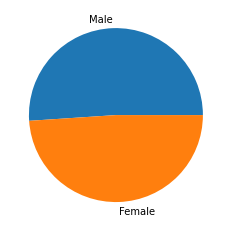

In [14]:
plt.pie(gender_count, labels=labels)
plt.show()

In [32]:
#Pie Chart 2: "Race"
race = df["race1r"].value_counts()
race

1    38102
2     6129
3     2829
Name: race1r, dtype: int64

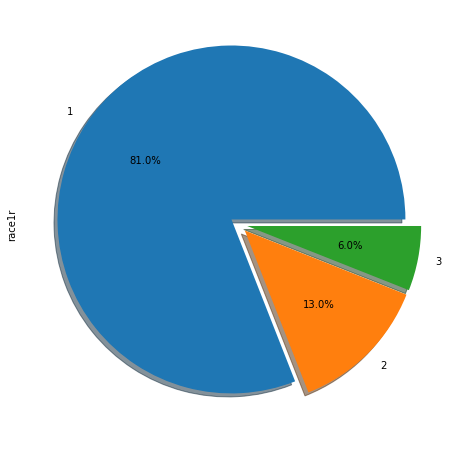

In [33]:
df['race1r'].value_counts().plot.pie(explode=[0.05, 0.05,0.05], autopct='%1.1f%%', shadow=True, figsize=(8,8))

In [31]:
race_df

,year,weight,gender,hispanic,ethnic1r,ager,marital2,hincome,popsize,region,...,notify,weapon,weapcat,newcrime,newoff,seriousviolent,injury,treatment,vicservices,locationr
race1r,,,,,,,,,,,,,,,,,,,,,
1,38102,38102,38102,38102,38102,38102,38102,38102,38102,38102,...,38102,38102,38102,38102,38102,38102,38102,38073,37778,38102
2,6129,6129,6129,6129,6129,6129,6129,6129,6129,6129,...,6129,6129,6129,6129,6129,6129,6129,6120,6049,6129
3,2829,2829,2829,2829,2829,2829,2829,2829,2829,2829,...,2829,2829,2829,2829,2829,2829,2829,2825,2779,2829


In [40]:
#Pie Chart 2: "Victim Services"
vic_serv = df["vicservices"].value_counts()
vic_serv

2.0    42796
1.0     3810
Name: vicservices, dtype: int64

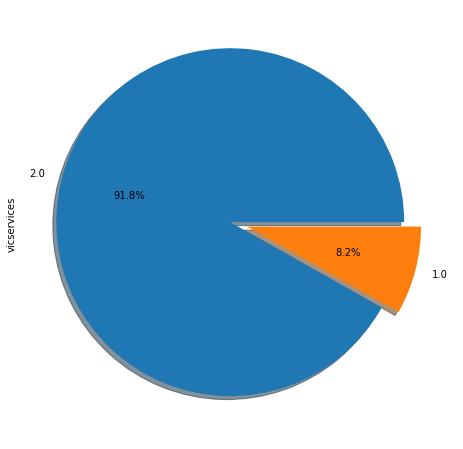

In [50]:
df['vicservices'].value_counts().plot.pie(explode=[0.05,0.05],autopct='%1.1f%%', shadow=True, figsize=(8,8))

In [45]:
# Pie Chart 3: "Weapon"
weapon = df["weapon"].value_counts()
weapon

2    32139
1    10608
3     4313
Name: weapon, dtype: int64

In [46]:
#weapon_df = weapon_df["year"].tolist()
type("weapon_df")
df["weapon_df"] = df['weapon_df'].astype(float)

KeyError: 'weapon_df'

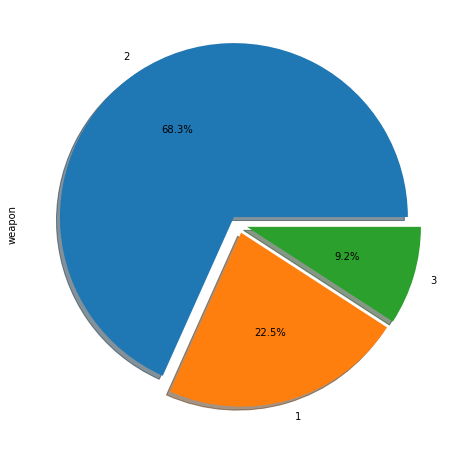

In [51]:
df['weapon'].value_counts().plot.pie(explode=[0.05, 0.05,0.05], autopct='%1.1f%%', shadow=True, figsize=(8,8))

In [21]:
#KeyError: 'weapon_df'
labels = ["Offender did not have weapon", "Offender had a weapon", "Don't know"]
df["weapon_df"] = df["weapon_df"].astype(float)
weapon_df = weapon_df["year"].tolist()

plt.pie(weapon_df,labels=labels)

KeyError: 'weapon_df'

In [ ]:
#NameError: name 'weapon_groupby' is not defined
labels = ["Do not know if offender had weapon", 
          "No, offender did not have weapon", 
          "Yes, offender had weapon" ]
weapon_df = weapon_df["year"].tolist()
weapon_df

In [ ]:
plt.pie(weapon_df, labels=labels)

In [ ]:
plt.show()

In [ ]:
# Pie Chart 4: "Victim Services"
vic_serv_df = df.groupby('vicservices').count()

vic_serv_df


In [ ]:
labels = ["Services received from victim service agencies", "No services received from victim service agencies"]
vic_serv_df = vic_serv_df["year"].tolist()
vic_serv_df

In [ ]:
plt.pie(vic_serv_df, labels=labels)
plt.title("Victim Services", bbox={'facecolor':'0.8', 'pad':5})


In [ ]:
plt.show()

In [ ]:
# Basic pie charts on the ager and newcrime variables 
# Pie Chart "Age of victim"
ager_df = df.groupby("ager").count()
ager_df

In [ ]:
labels = ["12 to 14", "15 to 17", "18 to 20", "21 to 24", "25 to 34", "35 to 49", "50 to 64", "65 or older"]
ager_df = ager_df["year"].tolist()
ager_df

In [ ]:
plt.pie(ager_df, labels=labels)
plt.title("Age of victim", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [ ]:
plt.show()

In [ ]:
#Basic pie charts on the ager and newcrime variables
# Pie Chart "Aggregate type of crime "
newcrime_df = df.groupby("newcrime").count()
newcrime_df

In [ ]:
labels = ["Personal theft/larceny", "Violent victimization"]
newcrime_df = newcrime_df["year"].tolist()
newcrime_df

In [ ]:
plt.pie(newcrime_df, labels=labels)
plt.title("Aggregate type of crime  (Newcrime)", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [ ]:
plt.show()


In [ ]:
#ValueError: 'label' must be of length 'x'

#hincome - Count or proportion of victims that fall within a certain household income group
hincome_df = df.groupby("hincome").count()
hincome_df

In [ ]:
labels = ["Less than $7,500", "$7,500 to $15,000", "$15,000 to $24,999", "$25,000 to $34,999", "$35,000 to $49,999", "$50,000 to $74,999","75,000 and more"]
hincome_df = hincome_df["year"].tolist()
hincome_df

In [ ]:
#ValueError: 'label' must be of length 'x'

plt.pie(newcrime_df, labels=labels)
plt.title("Household Income", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [ ]:
# Pie Chart "Weapon category"
#TypeError: float() argument must be a string or a number, not 'function'

weapon_cat = ["No weapon", "Firearm", "Knife", "Other type weapon", "Type weapon unknown", "Do not know if offender had weapon"]
colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral"]
explode = (0.1,0,0,0,0,0,0,0,0,0)


In [ ]:
#TypeError: float() argument must be a string or a number, not 'function'

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(_, explode=explode, labels=weapon_cat, colors=colors, shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen

plt.show()

In [ ]:
#nameError: name 'year' is not defined
# Bar Chart "Location vs Years"
year_group = year.groupby["year"]

# Count how many times each maker appears in our group
year_count = year_group["year"].count()

year_count

In [ ]:
# Bar Chart "Location vs Years"
locations = ["At or near victim's home","At or near friend, neighbor, or relative's home", "Commercial place, parking lot, or other public area","Other location"]
years = [8.6, 8.5, 8.3, 7.9, 7.2]
#x_axis = np.arange(len(years))

# Create a bar chart based upon the above data
plt.bar(x_axis, years, color="b", align="center")


In [ ]:
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, years)

In [ ]:
# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)

In [ ]:
plt.title("Location vs Years")
plt.xlabel("Years")
plt.ylabel("Location")

In [ ]:
plt.show()

In [ ]:
# Bar Chart "Weight vs Years"
# Can be useful in comparision with stock market data trends in certain years

In [ ]:
# Bar Chart "Victimization Weight vs Age"


In [ ]:
# Bar Chart "Victimization Weight vs Income"

In [ ]:
# Bar Charts
crime_outcomes = ["seriousviolent", "injury", "treatment"]
weight = []
x_axis = np.arange(len(weight))

In [ ]:
plt.bar(x_axis, weight, color="b", align="center")

In [ ]:
tick_crimeoutcomes = [value for value in x_axis]
plt.xticks(tick_crimeoutcomes, crime_outcomes)

In [ ]:
plt.show()